In [70]:
%pylab --no-import-all notebook
from math import sqrt, factorial, isnan
import warnings
from sympy.utilities.iterables import multiset_permutations
from hmmlearn.hmm import GaussianHMM
import pandas as pd
import itertools as it
import Classification as CL
import os
import time
from copy import copy
way = os.getcwd() + "/Data_npy/"
way1 = way + "Chosen ones/"
valid_path = os.getcwd() + "/Validační tabulky/"

Populating the interactive namespace from numpy and matplotlib


In [71]:
trlist = np.load(way + "new_seznam.npy").tolist()
trlist

['No116.npy',
 'No101.npy',
 'No100.npy',
 'No128.npy',
 'No221.npy',
 'No127.npy',
 'No104.npy',
 'No222.npy',
 'No106.npy',
 'No218.npy']

<IPython.core.display.Javascript object>


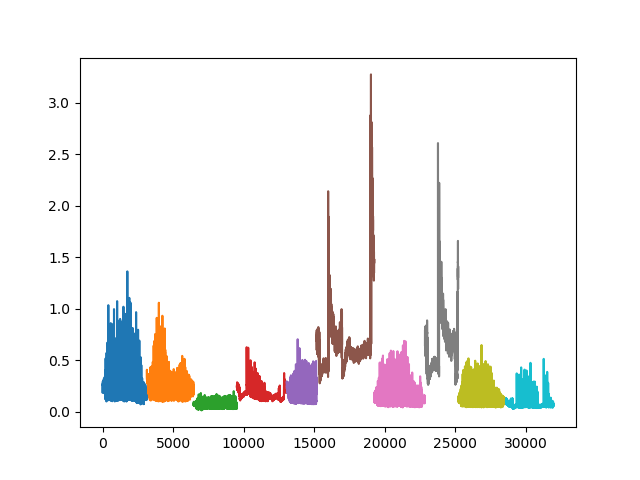

In [72]:
tmp = [np.load(way1 + d)[1] for d in trlist]
plt.figure("Vybraná reálná data")
posun = 0
for i in tmp:
    plt.plot(np.arange(len(i))+ posun, i)
    posun = posun +len(i) 
plt.show()

<IPython.core.display.Javascript object>


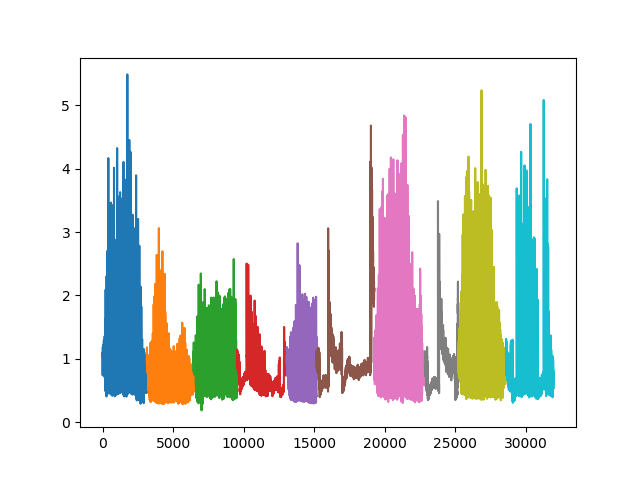

In [73]:
norma = [CL.Normalization(np.load(way1 + d)[1] , delka_useku = 20, training_set = True) for d in trlist]
plt.figure("Vybraná reálná data po normalizaci")
posun = 0
for i in norma:
    plt.plot(np.arange(len(i))+ posun, i)
    posun = posun +len(i) 
plt.show()

In [4]:
train_data = []
for data in trlist:
    train_data.append(np.load(way1 + data))


In [20]:
train_data1 = copy(train_data[:-3])
train_data1.append(train_data[-1])
train_data1.append(train_data[-2])
#train_data1.append(train_data[-3])
#train_data1.append(train_data[-4])
#train_data1.append(train_data[-5])
len(train_data1)


9

In [38]:
G_HMM = GaussianHMM(3, covariance_type = "full", algorithm = "viterbi", init_params='t', 
                 params = 'mtc')

In [10]:
#validace = CL.validuj(G_HMM, train_data[:-1], [train_data[-1]],\
#                      delka_okna =[4, 8, 12, 10], parametry  = [0,0,1,1,1], unsupervised = False)

In [39]:
validace = CL.validuj(G_HMM, train_data[:-1], [train_data[-1]],\
                      delka_okna =[[4,6], [8,10], [12,14,16], range(6,15)], parametry  = [], unsupervised = False)

[                                                                        ] N/A%

počet všech možných kombinací je  10035


[########################################################################] 100%


0


In [40]:
validace.to_csv(valid_path + 'Real_data_HMM_1.csv',index=False)

In [41]:
val = pd.read_csv(valid_path + "Real_data_HMM_1.csv")

In [52]:
Sorted = val.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2342,"(1, 0, 0, 1, 0)","(0, 10, 12, 9)",0.780916,737,0.898501,0.617647,0.685590,0.733912,0.921893,0.451844,0.899713,0.876265,0.975664,0.553792
2249,"(1, 0, 0, 1, 0)","(0, 10, 12, 6)",0.780916,737,0.898501,0.617647,0.685590,0.733912,0.921893,0.451844,0.899713,0.876265,0.975664,0.553792
2435,"(1, 0, 0, 1, 0)","(0, 10, 12, 12)",0.780916,737,0.898501,0.617647,0.685590,0.733912,0.921893,0.451844,0.899713,0.876265,0.975664,0.553792
2373,"(1, 0, 0, 1, 0)","(0, 10, 12, 10)",0.780916,737,0.898501,0.617647,0.685590,0.733912,0.921893,0.451844,0.899713,0.876265,0.975664,0.553792
2404,"(1, 0, 0, 1, 0)","(0, 10, 12, 11)",0.780916,737,0.898501,0.617647,0.685590,0.733912,0.921893,0.451844,0.899713,0.876265,0.975664,0.553792
2497,"(1, 0, 0, 1, 0)","(0, 10, 12, 14)",0.780916,737,0.898501,0.617647,0.685590,0.733912,0.921893,0.451844,0.899713,0.876265,0.975664,0.553792
2466,"(1, 0, 0, 1, 0)","(0, 10, 12, 13)",0.780916,737,0.898501,0.617647,0.685590,0.733912,0.921893,0.451844,0.899713,0.876265,0.975664,0.553792
2311,"(1, 0, 0, 1, 0)","(0, 10, 12, 8)",0.780916,737,0.898501,0.617647,0.685590,0.733912,0.921893,0.451844,0.899713,0.876265,0.975664,0.553792
2280,"(1, 0, 0, 1, 0)","(0, 10, 12, 7)",0.780916,737,0.898501,0.617647,0.685590,0.733912,0.921893,0.451844,0.899713,0.876265,0.975664,0.553792
2574,"(0, 0, 0, 1, 0)","(0, 10, 14, 8)",0.779727,741,0.895303,0.617080,0.680827,0.731070,0.900911,0.448000,0.975329,0.889764,0.991150,0.522928


# test nejlepších výsledků

In [44]:
test = CL.validuj(G_HMM, train_data[:-1], [train_data[-1]],\
                      delka_okna =[0, 10, 12, 9], parametry  = [1,0,0,1,0], unsupervised = False)



<IPython.core.display.Javascript object>


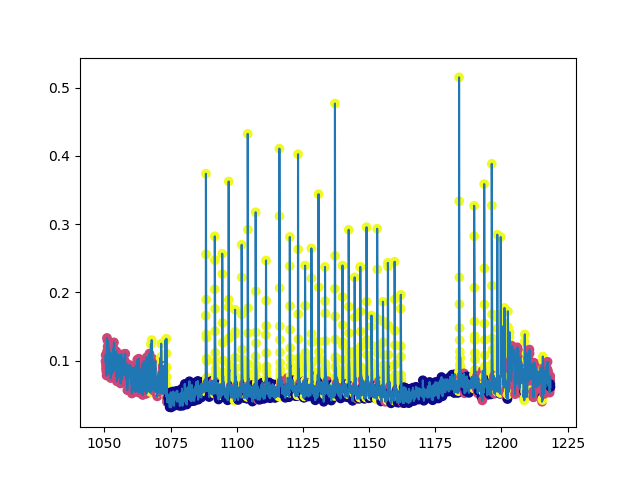

In [75]:
plt.figure("test 1 ")
plt.plot(train_data[-1][0],train_data[-1][1])
plt.scatter(train_data[-1][0], train_data[-1][1], c = test[1], cmap= plt.cm.plasma)

<IPython.core.display.Javascript object>


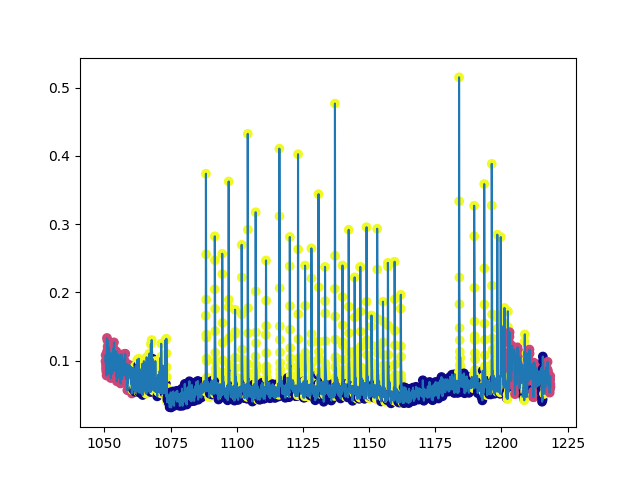

In [53]:
plt.figure("stavy skutečné")
plt.plot(train_data[-1][0],train_data[-1][1])
plt.scatter(train_data[-1][0], train_data[-1][1], c= train_data[-1][2], cmap= plt.cm.plasma)

# pokračování

In [36]:
#G = CL.validuj(G_HMM, train_data[:-1], [train_data[-1]],\
#                      delka_okna =[6, 10, 12, 12], parametry  = [0,1,0,1,1], unsupervised = False)
G = CL.validuj(G_HMM, train_data1, [train_data[-3]],\
                      delka_okna =[6, 0, 0, 12], parametry  = [0,0,1,0,1], unsupervised = False)


In [37]:
G[0]

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 0, 1, 0, 1)","[6, 0, 0, 12]",0.744907,601,0.794004,0.729594,0.304348,0.609315,0.667387,0.974421,0.191781,0.979915,0.58309,0.736842
1,0,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [32]:
G[1]

array([1, 1, 1, ..., 2, 2, 2])

In [27]:
G[4].transmat_

array([[ 0.95505537,  0.01171932,  0.03322531],
       [ 0.06223944,  0.93776056,  0.        ],
       [ 0.03029169,  0.0744879 ,  0.89522042]])

<IPython.core.display.Javascript object>


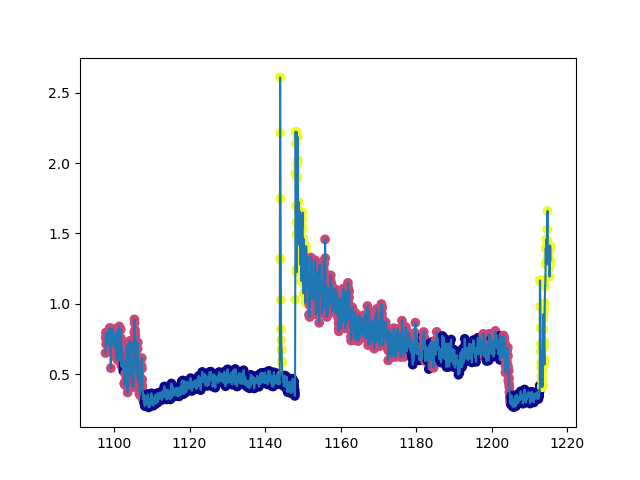

In [33]:
"""
plt.figure("stavy")
plt.plot(train_data[-1][0],train_data[-1][1])
plt.scatter(train_data[-1][0], train_data[-1][1], c = G[1], cmap= plt.cm.plasma)
"""
plt.figure("stavy")
plt.plot(train_data[-3][0],train_data[-3][1])
plt.scatter(train_data[-3][0], train_data[-3][1], c = G[1], cmap= plt.cm.plasma)

In [12]:
G[4].means_

array([[ 0.6101507 ,  0.00158881,  0.6120258 ,  0.6148616 ,  0.61709347,
         0.00164153],
       [ 0.75641598,  0.00158727,  0.77268121,  0.80002939,  0.82031865,
         0.02830368],
       [ 1.09628889, -0.00612363,  1.06939128,  1.0249394 ,  0.9915985 ,
         0.34856974]])

<IPython.core.display.Javascript object>


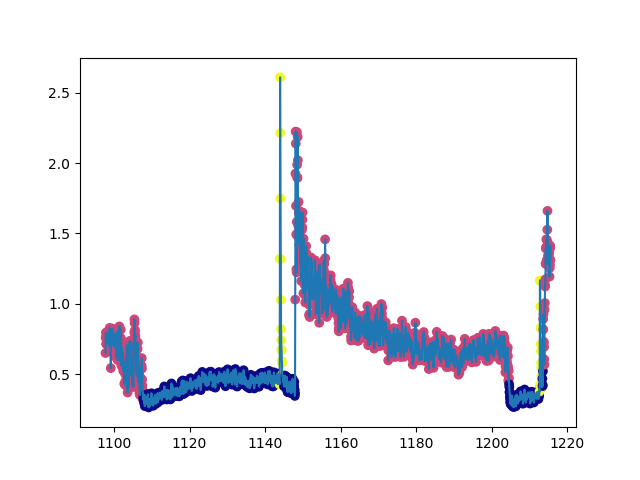

In [74]:
plt.figure("test")
plt.plot(train_data[-3][0],train_data[-3][1])
plt.scatter(train_data[-3][0], train_data[-3][1], c= train_data[-3][2], cmap= plt.cm.plasma)

# Další hromadné "simulace"

In [54]:
train_data7 = copy(train_data[:-7])+copy(train_data[-6:])
len(train_data7)



9

In [55]:
G_HMM = GaussianHMM(3, covariance_type = "full", algorithm = "viterbi", init_params='t', 
                 params = 'mtc')

val7 = CL.validuj(G_HMM, train_data7, [train_data[-7]],\
                      delka_okna =[[4,6], [8,10], [12,14,16], range(6,15)], parametry  = [], unsupervised = False)

[                                                                        ] N/A%

počet všech možných kombinací je  10035


[########################################################################] 100%


0


In [56]:
val7.to_csv(valid_path + 'Real_data_HMM_7.csv',index=False)

In [57]:
val7.sort_values(['Accuracy'], ascending=False).head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
7984,"(1, 0, 0, 1, 0)","(6, 8, 12, 11)",0.597395,1422,0.615061,0.503486,0.735849,0.618132,0.495206,0.587832,0.922297,0.811460,0.440308,0.612108
8488,"(1, 1, 0, 1, 0)","(6, 8, 16, 9)",0.597395,1422,0.631433,0.513011,0.683578,0.609341,0.506132,0.609541,0.844884,0.839187,0.442875,0.573991
8550,"(1, 1, 0, 1, 0)","(6, 8, 16, 11)",0.597395,1422,0.631433,0.513011,0.683578,0.609341,0.506132,0.609541,0.844884,0.839187,0.442875,0.573991
7891,"(1, 0, 0, 1, 0)","(6, 8, 12, 8)",0.597395,1422,0.615061,0.503486,0.735849,0.618132,0.495206,0.587832,0.922297,0.811460,0.440308,0.612108
8519,"(1, 1, 0, 1, 0)","(6, 8, 16, 10)",0.597395,1422,0.631433,0.513011,0.683578,0.609341,0.506132,0.609541,0.844884,0.839187,0.442875,0.573991
8077,"(1, 0, 0, 1, 0)","(6, 8, 12, 14)",0.597395,1422,0.615061,0.503486,0.735849,0.618132,0.495206,0.587832,0.922297,0.811460,0.440308,0.612108
7829,"(1, 0, 0, 1, 0)","(6, 8, 12, 6)",0.597395,1422,0.615061,0.503486,0.735849,0.618132,0.495206,0.587832,0.922297,0.811460,0.440308,0.612108
8581,"(1, 1, 0, 1, 0)","(6, 8, 16, 12)",0.597395,1422,0.631433,0.513011,0.683578,0.609341,0.506132,0.609541,0.844884,0.839187,0.442875,0.573991
8395,"(1, 1, 0, 1, 0)","(6, 8, 16, 6)",0.597395,1422,0.631433,0.513011,0.683578,0.609341,0.506132,0.609541,0.844884,0.839187,0.442875,0.573991
7922,"(1, 0, 0, 1, 0)","(6, 8, 12, 9)",0.597395,1422,0.615061,0.503486,0.735849,0.618132,0.495206,0.587832,0.922297,0.811460,0.440308,0.612108


<IPython.core.display.Javascript object>


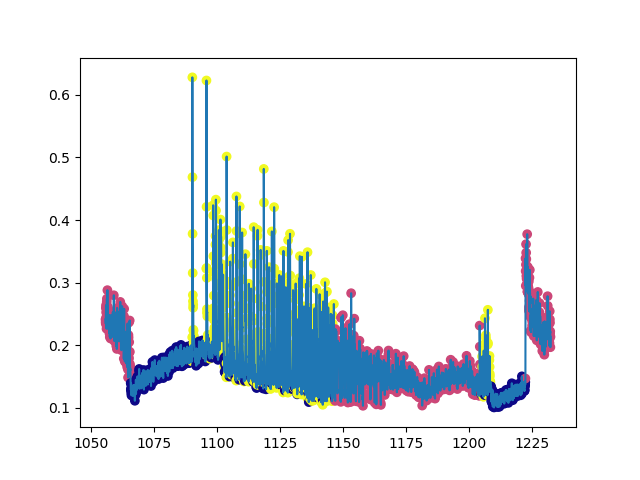

In [76]:
plt.figure("real 7")
plt.plot(train_data[-7][0],train_data[-7][1])
plt.scatter(train_data[-7][0], train_data[-7][1], c = train_data[-7][2], cmap= plt.cm.plasma)

In [61]:
np.load(way1 + trlist[3][:-4] + "_info.npy")

array(['Record number: ', '9252'], 
      dtype='<U15')

## další 

In [62]:
train_data8 = copy(train_data[:-8])+copy(train_data[-7:])
len(train_data8)

9

In [63]:
G_HMM = GaussianHMM(3, covariance_type = "full", algorithm = "viterbi", init_params='t', 
                 params = 'mtc')

val8 = CL.validuj(G_HMM, train_data8, [train_data[-8]],\
                      delka_okna =[[4,6], [8,10], [12,14,16], range(6,15)], parametry  = [], unsupervised = False)

[                                                                        ] N/A%

počet všech možných kombinací je  10035


[########################################################################] 100%


0


In [64]:
val8.to_csv(valid_path + 'Real_data_HMM_8.csv',index=False)

In [65]:
train_data9 = copy(train_data[:-9])+copy(train_data[-8:])
len(train_data9)

9

In [66]:
G_HMM = GaussianHMM(3, covariance_type = "full", algorithm = "viterbi", init_params='t', 
                 params = 'mtc')

val9 = CL.validuj(G_HMM, train_data9, [train_data[-9]],\
                      delka_okna =[[4,6], [8,10], [12,14,16], range(6,15)], parametry  = [], unsupervised = False)

[                                                                        ] N/A%

počet všech možných kombinací je  10035


[########################################################################] 100%


0


In [67]:
val9.to_csv(valid_path + 'Real_data_HMM_9.csv',index=False)

In [69]:
val8.sort_values(['Accuracy'], ascending=False).head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2502,"(1, 0, 1, 1, 1)","(0, 10, 12, 14)",0.720612,858,0.753853,0.418462,0.796271,0.656195,0.701639,0.368897,0.888290,0.814462,0.483412,0.721527
7518,"(1, 0, 0, 0, 1)","(6, 0, 16, 14)",0.720287,859,0.745255,0.470782,0.806838,0.674291,0.784437,0.360656,0.889224,0.709800,0.677725,0.738423
5007,"(1, 0, 0, 0, 1)","(4, 8, 14, 14)",0.720287,859,0.745255,0.470782,0.806838,0.674291,0.784437,0.360656,0.889224,0.709800,0.677725,0.738423
2217,"(1, 0, 0, 0, 1)","(0, 10, 0, 14)",0.720287,859,0.745255,0.470782,0.806838,0.674291,0.784437,0.360656,0.889224,0.709800,0.677725,0.738423
8355,"(1, 0, 0, 0, 1)","(6, 8, 14, 14)",0.720287,859,0.745255,0.470782,0.806838,0.674291,0.784437,0.360656,0.889224,0.709800,0.677725,0.738423
4170,"(1, 0, 0, 0, 1)","(4, 0, 16, 14)",0.720287,859,0.745255,0.470782,0.806838,0.674291,0.784437,0.360656,0.889224,0.709800,0.677725,0.738423
3612,"(1, 0, 0, 0, 1)","(4, 0, 12, 14)",0.720287,859,0.745255,0.470782,0.806838,0.674291,0.784437,0.360656,0.889224,0.709800,0.677725,0.738423
8913,"(1, 0, 0, 0, 1)","(6, 10, 0, 14)",0.720287,859,0.745255,0.470782,0.806838,0.674291,0.784437,0.360656,0.889224,0.709800,0.677725,0.738423
6960,"(1, 0, 0, 0, 1)","(6, 0, 12, 14)",0.720287,859,0.745255,0.470782,0.806838,0.674291,0.784437,0.360656,0.889224,0.709800,0.677725,0.738423
3054,"(1, 0, 0, 0, 1)","(0, 10, 16, 14)",0.720287,859,0.745255,0.470782,0.806838,0.674291,0.784437,0.360656,0.889224,0.709800,0.677725,0.738423
